In [1]:
! pip install turicreate==6.4.1

You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [2]:
from __future__ import print_function # to conform python 2.x print to python 3.x
import turicreate
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# import wiki data
wiki = turicreate.SFrame('people_wiki.sframe/')
wiki

URI,name,text
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...


In [4]:
wiki_docs = turicreate.text_analytics.count_words(wiki['text'])
wiki_docs = wiki_docs.dict_trim_by_keys(turicreate.text_analytics.stop_words(), exclude=True)

In [5]:
topic_model = turicreate.topic_model.create(wiki_docs, num_topics=10, num_iterations=200)

Learning a topic model

Number of documents     59071

Vocabulary size    547462

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 1m 5s         | 1.38956e+06    | 0               |

| 20        | 2m 2s         | 1.41369e+06    | 0               |

| 30        | 2m 59s        | 1.37094e+06    | 0               |

| 40        | 3m 56s        | 1.43336e+06    | 0               |

| 50        | 4m 51s        | 1.43953e+06    | 0               |

| 60        | 5m 47s        | 1.39489e+06    | 0               |

| 70        | 6m 43s        | 1.44088e+06    | 0               |

| 80        | 7m 39s        | 1.44221e+06    | 0               |

| 90        | 8m 35s        | 1.37217e+06    | 0               |

| 100       | 9m 32s        | 1.39195e+06    | 0               |

| 110       | 10m 28s       | 1.4178e+06     | 0               |

| 120       | 11m 25s       | 1.38893e+06    | 0               |

| 130       | 12m 21s       | 1.41342e+06    | 0               |

| 140       | 13m 17s       | 1.3739e+06     | 0               |

| 150       | 14m 14s       | 1.36602e+06    | 0               |

| 160       | 15m 11s       | 1.35057e+06    | 0               |

| 170       | 16m 8s        | 1.41463e+06    | 0               |

| 180       | 17m 5s        | 1.41014e+06    | 0               |

| 190       | 18m 1s        | 1.40904e+06    | 0               |

| 200       | 18m 56s       | 1.42102e+06    | 0               |

+-----------+---------------+----------------+-----------------+

In [6]:
topic_model

Class                          : TopicModel

Schema
------
Vocabulary Size                : 547462

Settings
--------
Number of Topics               : 10
alpha                          : 5.0
beta                           : 0.1
Iterations                     : 200
Training time                  : 1137.5913
Verbose                        : True

Accessible fields             : 
m.topics                      : An SFrame containing the topics.
m.vocabulary                  : An SArray containing the words in the vocabulary.
Useful methods                : 
m.get_topics()                : Get the most probable words per topic.
m.predict(new_docs)           : Make predictions for new documents.

In [9]:
#! unzip topic_models.zip

In [10]:
topic_model = turicreate.load_model('topic_models/lda_assignment_topic_model')

In [11]:
topic_model.get_topics()

topic,word,score
0,president,0.008339770494721031
0,business,0.008230612437460937
0,board,0.007476947242117326
0,director,0.007380128791330111
0,international,0.007123844656893367
1,university,0.04865493156332634
1,research,0.012161362488061602
1,professor,0.011922106881371426
1,school,0.009947805060239167
1,college,0.009489674880021313


In [19]:
?topic_model.get_topics

In [21]:
topic_model.get_topics(topic_ids=[2], num_words=50)['score'].sum()

0.18242098743820917

In [12]:
[x['words'] for x in topic_model.get_topics(output_type='topic_words', num_words=10)]

Using default 16 lambda workers.

To maximize the degree of parallelism, add the following code to the beginning of the program:

"turicreate.config.set_runtime_config('TURI_DEFAULT_NUM_PYLAMBDA_WORKERS', 32)"

Note that increasing the degree of parallelism also increases the memory footprint.

[['president',
  'business',
  'board',
  'director',
  'international',
  'company',
  'development',
  'member',
  'executive',
  'served'],
 ['university',
  'research',
  'professor',
  'school',
  'college',
  'science',
  'institute',
  'american',
  'received',
  'studies'],
 ['de',
  'born',
  'international',
  'music',
  'la',
  'orchestra',
  'opera',
  'french',
  'studied',
  'national'],
 ['work',
  'book',
  'art',
  'published',
  'york',
  'books',
  'magazine',
  'american',
  'arts',
  'works'],
 ['won',
  'world',
  'team',
  'club',
  'played',
  'season',
  'born',
  'cup',
  'football',
  'championship'],
 ['years',
  'born',
  'time',
  'family',
  'father',
  'people',
  'children',
  'called',
  'found',
  'son'],
 ['member',
  'served',
  'party',
  'state',
  'election',
  'law',
  'minister',
  'elected',
  'united',
  'general'],
 ['league',
  'played',
  'season',
  'career',
  'games',
  'coach',
  'major',
  'team',
  'high',
  'game'],
 ['film',
  'awa

Text(0.5, 1.0, 'Probabilities of Top 100 Words in each Topic')

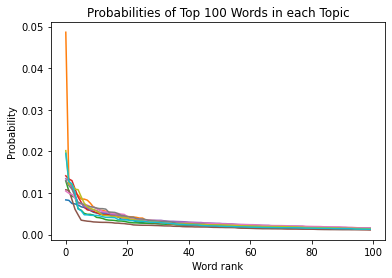

In [22]:
for i in range(10):
    plt.plot(range(100), topic_model.get_topics(topic_ids=[i], num_words=100)['score'])
plt.xlabel('Word rank')
plt.ylabel('Probability')
plt.title('Probabilities of Top 100 Words in each Topic')

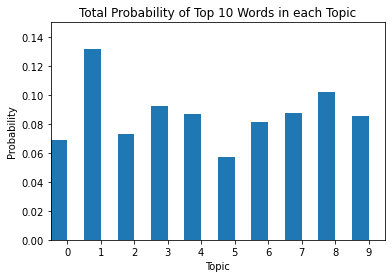

In [23]:
top_probs = [sum(topic_model.get_topics(topic_ids=[i], num_words=10)['score']) for i in range(10)]

ind = np.arange(10)
width = 0.5

fig, ax = plt.subplots()

ax.bar(ind-(width/2),top_probs,width)
ax.set_xticks(ind)

plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Total Probability of Top 10 Words in each Topic')
plt.xlim(-0.5,9.5)
plt.ylim(0,0.15)
plt.show()

In [27]:
themes = ['business',
          'science and research',
          'international music',
          'art and publishing',
          'team sports',
          'family and society',
          'politics',
          'international athletics',
          'TV and film',
          'general music']

In [28]:
obama = turicreate.SArray([wiki_docs[int(np.where(wiki['name']=='Barack Obama')[0])]])
pred1 = topic_model.predict(obama, output_type='probability')
pred2 = topic_model.predict(obama, output_type='probability')
print(turicreate.SFrame({'topics':themes, 'predictions (first draw)':pred1[0], 'predictions (second draw)':pred2[0]}))

+--------------------------+---------------------------+-------------------------+
| predictions (first draw) | predictions (second draw) |          topics         |
+--------------------------+---------------------------+-------------------------+
|   0.08064516129032258    |    0.07795698924731183    |         business        |
|   0.08333333333333333    |    0.051075268817204304   |   science and research  |
|   0.01881720430107527    |    0.03494623655913978    |   international music   |
|   0.024193548387096774   |    0.024193548387096774   |    art and publishing   |
|   0.053763440860215055   |    0.03225806451612903    |       team sports       |
|   0.06989247311827956    |    0.08602150537634409    |    family and society   |
|    0.5860215053763441    |     0.5860215053763441    |         politics        |
|   0.051075268817204304   |    0.06989247311827956    | international athletics |
|   0.013440860215053764   |    0.01881720430107527    |       TV and film       |
|   

In [29]:
def average_predictions(model, test_document, num_trials=100):
    avg_preds = np.zeros((model.num_topics))
    for i in range(num_trials):
        avg_preds += model.predict(test_document, output_type='probability')[0]
    avg_preds = avg_preds/num_trials
    result = turicreate.SFrame({'topics':themes, 'average predictions':avg_preds})
    result = result.sort('average predictions', ascending=False)
    return result

In [30]:
print(average_predictions(topic_model, obama, 100))

+----------------------+-------------------------+
| average predictions  |          topics         |
+----------------------+-------------------------+
|  0.5687903225806452  |         politics        |
| 0.09817204301075268  |         business        |
| 0.07580645161290324  |    family and society   |
| 0.06223118279569894  | international athletics |
| 0.06075268817204302  |   science and research  |
| 0.03661290322580647  |       team sports       |
| 0.030000000000000013 |   international music   |
| 0.027607526881720433 |    art and publishing   |
| 0.020483870967741923 |      general music      |
| 0.019543010752688158 |       TV and film       |
+----------------------+-------------------------+
[10 rows x 2 columns]



In [31]:
bush = turicreate.SArray([wiki_docs[int(np.where(wiki['name']=='George W. Bush')[0])]])
print(average_predictions(topic_model, bush, 100))

+----------------------+-------------------------+
| average predictions  |          topics         |
+----------------------+-------------------------+
|  0.4690350877192979  |         politics        |
|  0.1333918128654971  |         business        |
|  0.0834795321637427  |    family and society   |
| 0.06745614035087721  | international athletics |
| 0.06529239766081864  |   science and research  |
| 0.05105263157894736  |    art and publishing   |
| 0.04505847953216374  |      general music      |
| 0.03461988304093568  |       TV and film       |
| 0.029883040935672525 |       team sports       |
| 0.020730994152046777 |   international music   |
+----------------------+-------------------------+
[10 rows x 2 columns]



In [32]:
steve = turicreate.SArray([wiki_docs[int(np.where(wiki['name']=='Steven Gerrard')[0])]])
print(average_predictions(topic_model, steve, 100))

+----------------------+-------------------------+
| average predictions  |          topics         |
+----------------------+-------------------------+
|  0.6849599999999999  |       team sports       |
| 0.06691999999999998  | international athletics |
| 0.03712000000000002  |      general music      |
| 0.03612000000000003  |       TV and film       |
| 0.03544000000000003  |   international music   |
| 0.031920000000000025 |         business        |
| 0.03132000000000002  |         politics        |
| 0.02632000000000002  |    family and society   |
| 0.02524000000000002  |   science and research  |
| 0.024640000000000016 |    art and publishing   |
+----------------------+-------------------------+
[10 rows x 2 columns]



In [33]:
wiki['lda'] = topic_model.predict(wiki_docs, output_type='probability')

In [34]:
wiki['word_count'] = turicreate.text_analytics.count_words(wiki['text'])
wiki['tf_idf'] = turicreate.text_analytics.tf_idf(wiki['word_count'])

In [35]:
model_tf_idf = turicreate.nearest_neighbors.create(wiki, label='name', features=['tf_idf'],
                                                   method='brute_force', distance='cosine')
model_lda_rep = turicreate.nearest_neighbors.create(wiki, label='name', features=['lda'],
                                                    method='brute_force', distance='cosine')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [36]:
model_tf_idf.query(wiki[wiki['name'] == 'Paul Krugman'], label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 10.243ms     |

| Done         |         | 100         | 446.273ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Paul Krugman,Paul Krugman,0.0,1
Paul Krugman,Elise Brezis,0.7444980172622551,2
Paul Krugman,Maitreesh Ghatak,0.8156498483099809,3
Paul Krugman,Kai A. Konrad,0.8237005644064379,4
Paul Krugman,David Colander,0.8346259277590851,5
Paul Krugman,Richard Blundell,0.8379342678735122,6
Paul Krugman,Gordon Rausser,0.8394153470596016,7
Paul Krugman,Edward J. Nell,0.8421785000147988,8
Paul Krugman,Robin Boadway,0.8423742605956992,9
Paul Krugman,Tim Besley,0.8430881092528927,10


In [37]:
model_lda_rep.query(wiki[wiki['name'] == 'Paul Krugman'], label='name', k=10)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 2.308ms      |

| Done         |         | 100         | 76.689ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
Paul Krugman,Paul Krugman,0.0,1
Paul Krugman,Jahan Salehi,0.0030710442765345958,2
Paul Krugman,Kamla Nath Sharma,0.006446751090542491,3
Paul Krugman,Linda Stone,0.008268236124118422,4
Paul Krugman,George Shire,0.009834721067109697,5
Paul Krugman,Marisa Catalina Casey,0.009875810678294794,6
Paul Krugman,Matt Stephens,0.011168341315958119,7
Paul Krugman,Helen Wan,0.011362568657394823,8
Paul Krugman,Kathryn Tanner,0.011416413677744819,9
Paul Krugman,Menachem Creditor,0.011489262240393705,10


In [38]:
topic_model

Class                          : TopicModel

Schema
------
Vocabulary Size                : 547462

Settings
--------
Number of Topics               : 10
alpha                          : 5.0
beta                           : 0.1
Iterations                     : 200
Training time                  : 125.8235
Verbose                        : True

Accessible fields             : 
m.topics                      : An SFrame containing the topics.
m.vocabulary                  : An SArray containing the words in the vocabulary.
Useful methods                : 
m.get_topics()                : Get the most probable words per topic.
m.predict(new_docs)           : Make predictions for new documents.

In [40]:
tpm_low_alpha = turicreate.load_model('topic_models/lda_low_alpha')
tpm_high_alpha = turicreate.load_model('topic_models/lda_high_alpha')

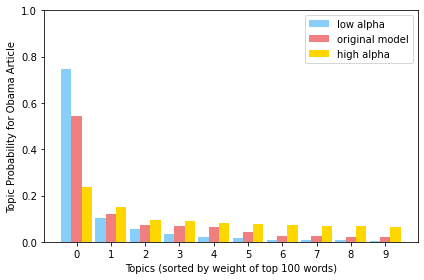

In [41]:
a = np.sort(tpm_low_alpha.predict(obama,output_type='probability')[0])[::-1]
b = np.sort(topic_model.predict(obama,output_type='probability')[0])[::-1]
c = np.sort(tpm_high_alpha.predict(obama,output_type='probability')[0])[::-1]
ind = np.arange(len(a))
width = 0.3

def param_bar_plot(a,b,c,ind,width,ylim,param,xlab,ylab):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    b1 = ax.bar(ind, a, width, color='lightskyblue')
    b2 = ax.bar(ind+width, b, width, color='lightcoral')
    b3 = ax.bar(ind+(2*width), c, width, color='gold')

    ax.set_xticks(ind+width)
    ax.set_xticklabels(range(10))
    ax.set_ylabel(ylab)
    ax.set_xlabel(xlab)
    ax.set_ylim(0,ylim)
    ax.legend(handles = [b1,b2,b3],labels=['low '+param,'original model','high '+param])

    plt.tight_layout()
    
param_bar_plot(a,b,c,ind,width,ylim=1.0,param='alpha',
               xlab='Topics (sorted by weight of top 100 words)',ylab='Topic Probability for Obama Article')

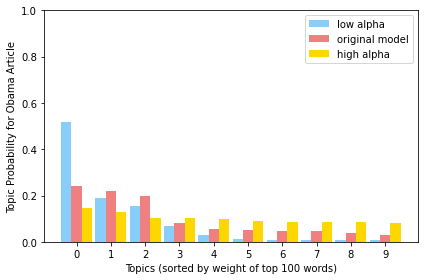

In [42]:
paul = turicreate.SArray([wiki_docs[int(np.where(wiki['name']=='Paul Krugman')[0])]])
a = np.sort(tpm_low_alpha.predict(paul,output_type='probability')[0])[::-1]
b = np.sort(topic_model.predict(paul,output_type='probability')[0])[::-1]
c = np.sort(tpm_high_alpha.predict(paul,output_type='probability')[0])[::-1]
ind = np.arange(len(a))
param_bar_plot(a,b,c,ind,width,ylim=1.0,param='alpha',
               xlab='Topics (sorted by weight of top 100 words)',ylab='Topic Probability for Obama Article')

In [43]:
print(average_predictions(tpm_low_alpha, paul, 100))

+----------------------+-------------------------+
| average predictions  |          topics         |
+----------------------+-------------------------+
|  0.4664197530864197  |    art and publishing   |
| 0.20722222222222217  | international athletics |
| 0.17648148148148152  |       team sports       |
| 0.07166666666666663  |   international music   |
| 0.01660493827160496  |   science and research  |
| 0.015864197530864207 |      general music      |
| 0.01401234567901236  |    family and society   |
| 0.011358024691358035 |         business        |
| 0.010370370370370384 |       TV and film       |
| 0.010000000000000014 |         politics        |
+----------------------+-------------------------+
[10 rows x 2 columns]



In [44]:
print(average_predictions(tpm_high_alpha, paul, 100))

+---------------------+-------------------------+
| average predictions |          topics         |
+---------------------+-------------------------+
| 0.14062883435582815 |         politics        |
| 0.13165644171779145 |       team sports       |
| 0.10596625766871164 |    family and society   |
| 0.10322085889570554 |   science and research  |
|  0.0944018404907975 |         business        |
| 0.08984662576687122 | international athletics |
| 0.08513803680981603 |    art and publishing   |
| 0.08458588957055216 |      general music      |
| 0.08288343558282203 |       TV and film       |
|  0.0816717791411043 |   international music   |
+---------------------+-------------------------+
[10 rows x 2 columns]



In [45]:
del tpm_low_alpha
del tpm_high_alpha
tpm_low_gamma = turicreate.load_model('topic_models/lda_low_gamma')
tpm_high_gamma = turicreate.load_model('topic_models/lda_high_gamma')

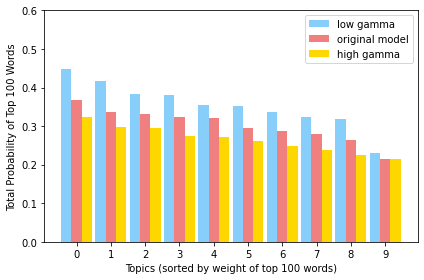

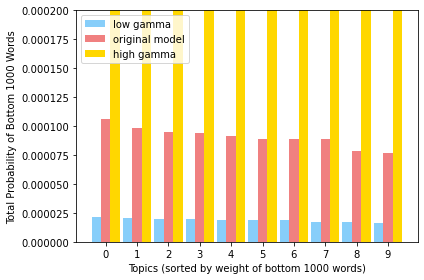

In [46]:
a_top = np.sort([sum(tpm_low_gamma.get_topics(topic_ids=[i], num_words=100)['score']) for i in range(10)])[::-1]
b_top = np.sort([sum(topic_model.get_topics(topic_ids=[i], num_words=100)['score']) for i in range(10)])[::-1]
c_top = np.sort([sum(tpm_high_gamma.get_topics(topic_ids=[i], num_words=100)['score']) for i in range(10)])[::-1]

a_bot = np.sort([sum(tpm_low_gamma.get_topics(topic_ids=[i], num_words=547462)[-1000:]['score']) for i in range(10)])[::-1]
b_bot = np.sort([sum(topic_model.get_topics(topic_ids=[i], num_words=547462)[-1000:]['score']) for i in range(10)])[::-1]
c_bot = np.sort([sum(tpm_high_gamma.get_topics(topic_ids=[i], num_words=547462)[-1000:]['score']) for i in range(10)])[::-1]

ind = np.arange(len(a))
width = 0.3
    
param_bar_plot(a_top, b_top, c_top, ind, width, ylim=0.6, param='gamma',
               xlab='Topics (sorted by weight of top 100 words)', 
               ylab='Total Probability of Top 100 Words')

param_bar_plot(a_bot, b_bot, c_bot, ind, width, ylim=0.0002, param='gamma',
               xlab='Topics (sorted by weight of bottom 1000 words)',
               ylab='Total Probability of Bottom 1000 Words')

In [58]:
?tpm_low_gamma.get_topics

In [64]:
tpm_low_gamma.get_topics(cdf_cutoff=0.5, num_words=4)['score'].sum()

0.5699196318490106

In [54]:
tpm_high_gamma.get_topics(cdf_cutoff=0.5)

topic,word,score
0,born,0.021626985068395006
0,canadian,0.008972841275188484
0,canada,0.007936121958047267
0,member,0.007643136064072575
0,1993,0.00608568473294395
1,music,0.012431803827419406
1,de,0.011373837783537712
1,international,0.007563660693703368
1,la,0.005199401766587764
1,orchestra,0.00515817014043117


In [67]:
tpm_high_gamma.get_topics(cdf_cutoff=0.5, num_words=6)['score'].sum()

0.5558728543326116

In [10]:
from __future__ import print_function # to conform python 2.x print to python 3.x
import turicreate
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import time
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
%matplotlib inline

In [11]:
wiki = turicreate.SFrame('people_wiki.sframe/')

In [12]:
wiki['tf_idf'] = turicreate.text_analytics.tf_idf(wiki['text'])

In [13]:
from em_utilities import sframe_to_scipy # converter

# This will take about a minute or two.
wiki = wiki.add_row_number()
tf_idf, map_word_to_index = sframe_to_scipy(wiki, 'tf_idf')

Using default 16 lambda workers.

To maximize the degree of parallelism, add the following code to the beginning of the program:

"turicreate.config.set_runtime_config('TURI_DEFAULT_NUM_PYLAMBDA_WORKERS', 32)"

Note that increasing the degree of parallelism also increases the memory footprint.

In [14]:
from sklearn.preprocessing import normalize
tf_idf = normalize(tf_idf)

In [15]:
def bipartition(cluster, maxiter=400, num_runs=4, seed=None):
    '''cluster: should be a dictionary containing the following keys
                * dataframe: original dataframe
                * matrix:    same data, in matrix format
                * centroid:  centroid for this particular cluster'''
    
    data_matrix = cluster['matrix']
    dataframe   = cluster['dataframe']
    
    # Run k-means on the data matrix with k=2. We use scikit-learn here to simplify workflow.
    kmeans_model = KMeans(n_clusters=2, max_iter=maxiter, n_init=num_runs, random_state=seed, n_jobs=1)
    kmeans_model.fit(data_matrix)
    centroids, cluster_assignment = kmeans_model.cluster_centers_, kmeans_model.labels_
    
    # Divide the data matrix into two parts using the cluster assignments.
    data_matrix_left_child, data_matrix_right_child = data_matrix[cluster_assignment==0], \
                                                      data_matrix[cluster_assignment==1]
    
    # Divide the dataframe into two parts, again using the cluster assignments.
    cluster_assignment_sa = turicreate.SArray(cluster_assignment) # minor format conversion
    dataframe_left_child, dataframe_right_child     = dataframe[cluster_assignment_sa==0], \
                                                      dataframe[cluster_assignment_sa==1]
        
    
    # Package relevant variables for the child clusters
    cluster_left_child  = {'matrix': data_matrix_left_child,
                           'dataframe': dataframe_left_child,
                           'centroid': centroids[0]}
    cluster_right_child = {'matrix': data_matrix_right_child,
                           'dataframe': dataframe_right_child,
                           'centroid': centroids[1]}
    
    return (cluster_left_child, cluster_right_child)

In [16]:
%%time
wiki_data = {'matrix': tf_idf, 'dataframe': wiki} # no 'centroid' for the root cluster
left_child, right_child = bipartition(wiki_data, maxiter=100, num_runs=1, seed=0)

CPU times: user 2min 43s, sys: 4.89 s, total: 2min 48s
Wall time: 2min 43s


In [17]:
left_child

{'matrix': <47561x547979 sparse matrix of type '<class 'numpy.float64'>'
 	with 8493452 stored elements in Compressed Sparse Row format>,
 'dataframe': Columns:
 	id	int
 	URI	str
 	name	str
 	text	str
 	tf_idf	dict
 
 Rows: Unknown
 
 Data:
 +----+-------------------------------+---------------------+
 | id |              URI              |         name        |
 +----+-------------------------------+---------------------+
 | 1  | <http://dbpedia.org/resour... |    Alfred J. Lewy   |
 | 2  | <http://dbpedia.org/resour... |    Harpdog Brown    |
 | 3  | <http://dbpedia.org/resour... | Franz Rottensteiner |
 | 4  | <http://dbpedia.org/resour... |        G-Enka       |
 | 5  | <http://dbpedia.org/resour... |    Sam Henderson    |
 | 6  | <http://dbpedia.org/resour... |    Aaron LaCrate    |
 | 7  | <http://dbpedia.org/resour... |   Trevor Ferguson   |
 | 8  | <http://dbpedia.org/resour... |     Grant Nelson    |
 | 9  | <http://dbpedia.org/resour... |     Cathy Caruth    |
 | 10 | <http:

In [18]:
right_child

{'matrix': <11510x547979 sparse matrix of type '<class 'numpy.float64'>'
 	with 1885831 stored elements in Compressed Sparse Row format>,
 'dataframe': Columns:
 	id	int
 	URI	str
 	name	str
 	text	str
 	tf_idf	dict
 
 Rows: Unknown
 
 Data:
 +----+-------------------------------+-------------------------------+
 | id |              URI              |              name             |
 +----+-------------------------------+-------------------------------+
 | 0  | <http://dbpedia.org/resour... |         Digby Morrell         |
 | 17 | <http://dbpedia.org/resour... | Paddy Dunne (Gaelic footba... |
 | 21 | <http://dbpedia.org/resour... |         Ceiron Thomas         |
 | 22 | <http://dbpedia.org/resour... |          Adel Sellimi         |
 | 25 | <http://dbpedia.org/resour... |          Vic Stasiuk          |
 | 28 | <http://dbpedia.org/resour... |          Leon Hapgood         |
 | 30 | <http://dbpedia.org/resour... |           Dom Flora           |
 | 33 | <http://dbpedia.org/resour... 

In [19]:
def display_single_tf_idf_cluster(cluster, map_index_to_word):
    '''map_index_to_word: SFrame specifying the mapping betweeen words and column indices'''
    
    wiki_subset   = cluster['dataframe']
    tf_idf_subset = cluster['matrix']
    centroid      = cluster['centroid']
    
    # Print top 5 words with largest TF-IDF weights in the cluster
    idx = centroid.argsort()[::-1]
    for i in range(5):
        print('{0}:{1:.3f}'.format(map_index_to_word['category'], centroid[idx[i]])),
    print('')
    
    # Compute distances from the centroid to all data points in the cluster.
    distances = pairwise_distances(tf_idf_subset, [centroid], metric='euclidean').flatten()
    # compute nearest neighbors of the centroid within the cluster.
    nearest_neighbors = distances.argsort()
    # For 8 nearest neighbors, print the title as well as first 180 characters of text.
    # Wrap the text at 80-character mark.
    for i in range(8):
        text = ' '.join(wiki_subset[nearest_neighbors[i]]['text'].split(None, 25)[0:25])
        print('* {0:50s} {1:.5f}\n  {2:s}\n  {3:s}'.format(wiki_subset[nearest_neighbors[i]]['name'],
              distances[nearest_neighbors[i]], text[:90], text[90:180] if len(text) > 90 else ''))
    print('')

In [20]:
display_single_tf_idf_cluster(left_child, map_word_to_index)

113949:0.025
113949:0.017
113949:0.012
113949:0.011
113949:0.011

* Anita Kunz                                         0.97401
  anita e kunz oc born 1956 is a canadianborn artist and illustratorkunz has lived in london
   new york and toronto contributing to magazines and working
* Janet Jackson                                      0.97472
  janet damita jo jackson born may 16 1966 is an american singer songwriter and actress know
  n for a series of sonically innovative socially conscious and
* Madonna (entertainer)                              0.97475
  madonna louise ciccone tkoni born august 16 1958 is an american singer songwriter actress 
  and businesswoman she achieved popularity by pushing the boundaries of lyrical
* %C3%81ine Hyland                                   0.97536
  ine hyland ne donlon is emeritus professor of education and former vicepresident of univer
  sity college cork ireland she was born in 1942 in athboy co
* Jane Fonda                                     

In [21]:
display_single_tf_idf_cluster(right_child, map_word_to_index)

113949:0.040
113949:0.036
113949:0.029
113949:0.029
113949:0.028

* Todd Williams                                      0.95468
  todd michael williams born february 13 1971 in syracuse new york is a former major league 
  baseball relief pitcher he attended east syracuseminoa high school
* Gord Sherven                                       0.95622
  gordon r sherven born august 21 1963 in gravelbourg saskatchewan and raised in mankota sas
  katchewan is a retired canadian professional ice hockey forward who played
* Justin Knoedler                                    0.95639
  justin joseph knoedler born july 17 1980 in springfield illinois is a former major league 
  baseball catcherknoedler was originally drafted by the st louis cardinals
* Chris Day                                          0.95648
  christopher nicholas chris day born 28 july 1975 is an english professional footballer who
   plays as a goalkeeper for stevenageday started his career at tottenham
* Tony Smith (football

In [22]:
non_athletes_artists   = left_child
athletes_artists       = right_child

In [23]:
# Bipartition the cluster of athletes and artists
left_child_athletes_artists, right_child_athletes_artists = bipartition(athletes_artists, maxiter=100, num_runs=6, seed=1)

In [24]:
display_single_tf_idf_cluster(left_child_athletes_artists, map_word_to_index)

113949:0.054
113949:0.043
113949:0.038
113949:0.035
113949:0.030

* Tony Smith (footballer, born 1957)                 0.94677
  anthony tony smith born 20 february 1957 is a former footballer who played as a central de
  fender in the football league in the 1970s and
* Justin Knoedler                                    0.94746
  justin joseph knoedler born july 17 1980 in springfield illinois is a former major league 
  baseball catcherknoedler was originally drafted by the st louis cardinals
* Chris Day                                          0.94849
  christopher nicholas chris day born 28 july 1975 is an english professional footballer who
   plays as a goalkeeper for stevenageday started his career at tottenham
* Todd Williams                                      0.94882
  todd michael williams born february 13 1971 in syracuse new york is a former major league 
  baseball relief pitcher he attended east syracuseminoa high school
* Todd Curley                                     

In [25]:
display_single_tf_idf_cluster(right_child_athletes_artists, map_word_to_index)

113949:0.045
113949:0.043
113949:0.035
113949:0.031
113949:0.031

* Alessandra Aguilar                                 0.93880
  alessandra aguilar born 1 july 1978 in lugo is a spanish longdistance runner who specialis
  es in marathon running she represented her country in the event
* Heather Samuel                                     0.93999
  heather barbara samuel born 6 july 1970 is a retired sprinter from antigua and barbuda who
   specialized in the 100 and 200 metres in 1990
* Viola Kibiwot                                      0.94037
  viola jelagat kibiwot born december 22 1983 in keiyo district is a runner from kenya who s
  pecialises in the 1500 metres kibiwot won her first
* Ayelech Worku                                      0.94052
  ayelech worku born june 12 1979 is an ethiopian longdistance runner most known for winning
   two world championships bronze medals on the 5000 metres she
* Krisztina Papp                                     0.94105
  krisztina papp born 17

In [26]:
athletes    = left_child_athletes_artists
artists     = right_child_athletes_artists

In [27]:
left_child_athletes, right_child_athletes = bipartition(athletes, maxiter=100, num_runs=6, seed=1)

In [28]:
display_single_tf_idf_cluster(left_child_athletes, map_word_to_index)
display_single_tf_idf_cluster(right_child_athletes, map_word_to_index)

113949:0.110
113949:0.102
113949:0.051
113949:0.046
113949:0.045

* Steve Springer                                     0.89370
  steven michael springer born february 11 1961 is an american former professional baseball 
  player who appeared in major league baseball as a third baseman and
* Dave Ford                                          0.89622
  david alan ford born december 29 1956 is a former major league baseball pitcher for the ba
  ltimore orioles born in cleveland ohio ford attended lincolnwest
* Todd Williams                                      0.89829
  todd michael williams born february 13 1971 in syracuse new york is a former major league 
  baseball relief pitcher he attended east syracuseminoa high school
* Justin Knoedler                                    0.90102
  justin joseph knoedler born july 17 1980 in springfield illinois is a former major league 
  baseball catcherknoedler was originally drafted by the st louis cardinals
* Kevin Nicholson (baseball)        

In [29]:
%%time 
# Bipartition the cluster of non-athletes
left_child_non_athletes_artists, right_child_non_athletes_artists = bipartition(non_athletes_artists, maxiter=100, num_runs=3, seed=1)

CPU times: user 8min 54s, sys: 22.1 s, total: 9min 16s
Wall time: 8min 54s


In [30]:
display_single_tf_idf_cluster(left_child_non_athletes_artists, map_word_to_index)

113949:0.016
113949:0.013
113949:0.013
113949:0.012
113949:0.012

* Barry Sullivan (lawyer)                            0.97227
  barry sullivan is a chicago lawyer and as of july 1 2009 the cooney conway chair in advoca
  cy at loyola university chicago school of law
* Kayee Griffin                                      0.97444
  kayee frances griffin born 6 february 1950 is an australian politician and former australi
  an labor party member of the new south wales legislative council serving
* Christine Robertson                                0.97450
  christine mary robertson born 5 october 1948 is an australian politician and former austra
  lian labor party member of the new south wales legislative council serving
* James A. Joseph                                    0.97464
  james a joseph born 1935 is an american former diplomatjoseph is professor of the practice
   of public policy studies at duke university and founder of
* David Anderson (British Columbia politician)       0.9

In [31]:
display_single_tf_idf_cluster(right_child_non_athletes_artists, map_word_to_index)

113949:0.039
113949:0.030
113949:0.023
113949:0.021
113949:0.015

* Madonna (entertainer)                              0.96092
  madonna louise ciccone tkoni born august 16 1958 is an american singer songwriter actress 
  and businesswoman she achieved popularity by pushing the boundaries of lyrical
* Janet Jackson                                      0.96153
  janet damita jo jackson born may 16 1966 is an american singer songwriter and actress know
  n for a series of sonically innovative socially conscious and
* Cher                                               0.96540
  cher r born cherilyn sarkisian may 20 1946 is an american singer actress and television ho
  st described as embodying female autonomy in a maledominated industry
* Laura Smith                                        0.96600
  laura smith is a canadian folk singersongwriter she is best known for her 1995 single shad
  e of your love one of the years biggest hits
* Natashia Williams                                  0

In [32]:
politicians_etc = left_child_non_athletes_artists
female_figures = right_child_non_athletes_artists

In [33]:
%%time 
# Bipartition the cluster of non-athletes
left_child_politicians_etc, right_child_politicians_etc = bipartition(politicians_etc, maxiter=100, num_runs=3, seed=1)

CPU times: user 5min 45s, sys: 25.7 s, total: 6min 11s
Wall time: 5min 44s


In [34]:
display_single_tf_idf_cluster(left_child_politicians_etc, map_word_to_index)

113949:0.039
113949:0.036
113949:0.033
113949:0.028
113949:0.026

* Kayee Griffin                                      0.95170
  kayee frances griffin born 6 february 1950 is an australian politician and former australi
  an labor party member of the new south wales legislative council serving
* Marcelle Mersereau                                 0.95417
  marcelle mersereau born february 14 1942 in pointeverte new brunswick is a canadian politi
  cian a civil servant for most of her career she also served
* Lucienne Robillard                                 0.95453
  lucienne robillard pc born june 16 1945 is a canadian politician and a member of the liber
  al party of canada she sat in the house
* Maureen Lyster                                     0.95590
  maureen anne lyster born 10 september 1943 is an australian politician she was an australi
  an labor party member of the victorian legislative assembly from 1985
* Liz Cunningham                                     0.95690
  eliz

In [35]:
display_single_tf_idf_cluster(right_child_politicians_etc, map_word_to_index)

113949:0.018
113949:0.015
113949:0.013
113949:0.013
113949:0.010

* Lawrence W. Green                                  0.97495
  lawrence w green is best known by health education researchers as the originator of the pr
  ecede model and codeveloper of the precedeproceed model which has
* James A. Joseph                                    0.97506
  james a joseph born 1935 is an american former diplomatjoseph is professor of the practice
   of public policy studies at duke university and founder of
* Timothy Luke                                       0.97584
  timothy w luke is university distinguished professor of political science in the college o
  f liberal arts and human sciences as well as program chair of
* Archie Brown                                       0.97628
  archibald haworth brown cmg fba commonly known as archie brown born 10 may 1938 is a briti
  sh political scientist and historian in 2005 he became
* Jerry L. Martin                                    0.97687
  jerr

In [36]:
%%time 
# Bipartition the cluster of non-athletes
left_child_female_figures, right_child_female_figures = bipartition(female_figures, maxiter=100, num_runs=3, seed=1)

CPU times: user 3min 15s, sys: 14.3 s, total: 3min 30s
Wall time: 3min 15s


In [37]:
display_single_tf_idf_cluster(left_child_female_figures, map_word_to_index)

113949:0.027
113949:0.023
113949:0.017
113949:0.016
113949:0.015

* Julian Knowles                                     0.96904
  julian knowles is an australian composer and performer specialising in new and emerging te
  chnologies his creative work spans the fields of composition for theatre dance
* Peter Combe                                        0.97080
  peter combe born 20 october 1948 is an australian childrens entertainer and musicianmusica
  l genre childrens musiche has had 22 releases including seven gold albums two
* Craig Pruess                                       0.97121
  craig pruess born 1950 is an american composer musician arranger and gold platinum record 
  producer who has been living in britain since 1973 his career
* Ceiri Torjussen                                    0.97169
  ceiri torjussen born 1976 is a composer who has contributed music to dozens of film and te
  levision productions in the ushis music was described by
* Brenton Broadstock              

In [38]:
display_single_tf_idf_cluster(right_child_female_figures, map_word_to_index)

113949:0.124
113949:0.092
113949:0.015
113949:0.015
113949:0.014

* Janet Jackson                                      0.93374
  janet damita jo jackson born may 16 1966 is an american singer songwriter and actress know
  n for a series of sonically innovative socially conscious and
* Barbara Hershey                                    0.93507
  barbara hershey born barbara lynn herzstein february 5 1948 once known as barbara seagull 
  is an american actress in a career spanning nearly 50 years
* Lauren Royal                                       0.93717
  lauren royal born march 3 circa 1965 is a book writer from california royal has written bo
  th historic and novelistic booksa selfproclaimed angels baseball fan
* Alexandra Potter                                   0.93802
  alexandra potter born 1970 is a british author of romantic comediesborn in bradford yorksh
  ire england and educated at liverpool university gaining an honors degree in
* Cher                                    